In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

oil 가격 데이터 불러오기

In [2]:
oil_filename = '../data/wti-daily.csv'
oil_df = pd.read_csv(oil_filename, 
                     parse_dates=[0], 
                     header=0,
                     names=['date', 'oil'],
                    index_col=0)

In [3]:
oil_df

,oil
date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
...,...
2021-12-14,70.57
2021-12-15,70.89
2021-12-16,72.34


icecream 가격 데이터 불러오기

In [4]:

ice_cream_filename = '../data/ice-cream.csv'
ice_cream_df = pd.read_csv(ice_cream_filename, 
                           parse_dates=[0], 
                           index_col=0,
                           header=0,
                          names=['date','icecream'])

In [5]:
ice_cream_df

,icecream
date,
1980-01-01,1.755
1980-02-01,1.775
1980-03-01,1.718
1980-04-01,1.769
1980-05-01,1.822
...,...
2021-09-01,4.900
2021-10-01,4.952
2021-11-01,4.770


그런데 dtype 이 object로 되어 있음.

In [6]:
ice_cream_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 1980-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   icecream  505 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB


icecream 가격에 숫자가 아닌 오류 데이터가 하나 들어 있음.

In [7]:
ice_cream_df['icecream'].str.contains(r'\d').value_counts()

icecream
True     504
False      1
Name: count, dtype: int64

이상치 확인: 점 하나만 적혀 있음

In [8]:
ice_cream_df[~ ice_cream_df['icecream'].str.contains(r'\d')]

,icecream
date,
1987-01-01,.


이상치 제거 후 dtype 지정

In [9]:
ice_cream_df = ice_cream_df[ice_cream_df['icecream'].str.contains(r'\d')]
ice_cream_df.loc[:, 'icecream'] = ice_cream_df.loc[:, 'icecream'].astype(np.float64)

miles 데이터 불러오기

In [10]:

miles_filename = '../data/miles-traveled.csv'
miles_df = pd.read_csv(miles_filename, parse_dates=[0], 
                       index_col=0,
                       header=0,
                      names=['date', 'miles'])

In [11]:
miles_df

,miles
date,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0
...,...
2021-08-01,287397.0
2021-09-01,277979.0
2021-10-01,285760.0


oil, icecream, miles 데잍 합치기: 날짜 인덱스 기준

In [12]:
df = oil_df.join(ice_cream_df, how='inner').join(miles_df, how='inner')


# Beyond 1

Is the month correlated with these values? And if not, why would we get such weird values?

In [13]:
df = df.reset_index()
df['month'] = df['date'].dt.month
df = df.set_index('date')
df.corr()

,oil,icecream,miles,month
oil,1.000000,0.777347,0.645250,0.006616
icecream,0.777347,1.000000,0.818383,-0.003985
miles,0.645250,0.818383,1.000000,0.079290
month,0.006616,-0.003985,0.079290,1.000000


# Beyond 2

Create a scatter plot of `icecream` vs. `miles`, adding color using the month the "Spectral" colormap.

<Axes: xlabel='icecream', ylabel='miles'>

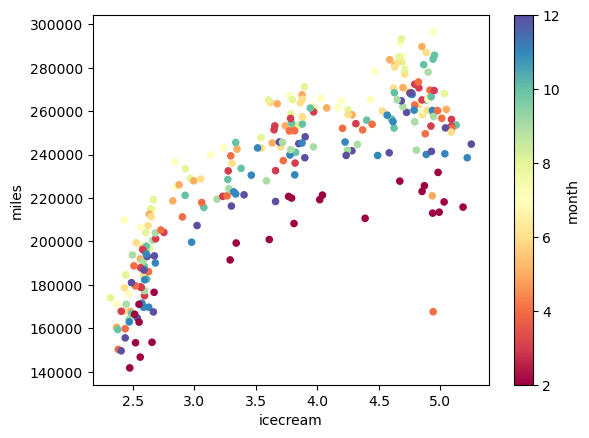

In [14]:
df.plot.scatter(x='icecream', y='miles', c='month', colormap='Spectral')


# Beyond 3

Instead of using an inner join, we could have removed all of the rows from `oil_df` that weren't on the first day of the month. How could we do that?

icecream_df, miles_df 데이터프레임에는 매달 1일 데이터만 포함되어 있었음.

In [15]:
ice_cream_df.shape[0] == (ice_cream_df.reset_index())['date'].dt.is_month_start.sum()

np.True_

In [16]:
miles_df.shape[0] == (miles_df.reset_index())['date'].dt.is_month_start.sum()

np.True_

반면에 oil_df에는 다양할 날짜의 데이터가 포함되어 있음.

In [17]:
oil_df.head()

,oil
date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


먼저 oil_df 에서 매달 1일 데이터만 추출한다.

In [18]:
oil_df = oil_df.reset_index()
oil_df = oil_df[oil_df['date'].dt.is_month_start]
oil_df = oil_df.set_index('date')

이제 세 데이터셋을 합치면 이전과 동일한 결과를 얻는다.

In [19]:
df = oil_df.join(ice_cream_df).join(miles_df)
df.head()


,oil,icecream,miles
date,,,
1986-04-01,11.13,2.382,150277.0
1986-05-01,13.80,2.368,160459.0
1986-07-01,12.39,2.369,171114.0
1986-08-01,11.56,2.319,173977.0
1986-10-01,15.23,2.377,159434.0
